In [ ]:
!pip3 install keras==2.2.4
!pip install 'h5py==2.10.0' --force-reinstall
!pip3 install pickle5

  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lucid 0.3.10 requires umap-learn, which is not installed.
tensorflow 1.15.2 requires gast==0.2.2, but you have gast 0.5.3 which is incompatible.
lucid 0.3.10 requir

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)


1.15.2
2.2.4-tf


In [ ]:
!git clone https://github.com/matterport/Mask_RCNN


fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [ ]:
import os
os.chdir("Mask_RCNN/")

import numpy as np
import cv2
import mrcnn.config
import mrcnn.utils
from mrcnn.model import MaskRCNN
from pathlib import Path
from google.colab.patches import cv2_imshow
import pickle5 as pickle

from shapely.geometry import box
from shapely.geometry import Polygon as shapely_poly
from IPython.display import clear_output, Image, display, HTML
import io
import base64
%matplotlib inline

Using TensorFlow backend.


In [ ]:
class Config(mrcnn.config.Config):
    NAME = "coco_pretrained_model_config"
    IMAGES_PER_GPU = 1
    GPU_COUNT = 1
    NUM_CLASSES = 81

config = Config()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
ROOT_DIR = Path(".")
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

In [ ]:
if not os.path.exists(COCO_MODEL_PATH):
    mrcnn.utils.download_trained_weights(COCO_MODEL_PATH)

In [ ]:
model = MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=Config())









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [ ]:
model.load_weights(COCO_MODEL_PATH, by_name=True)


In [ ]:
#  This will contain test videos and images
if not os.path.exists("./data"):
    os.makedirs("./data")

In [ ]:
VIDEO_SOURCE = "/content/Mask_RCNN/data/parkinglot_1_480p.mp4"
PARKING_REGIONS = "/content/Mask_RCNN/data/regions.p"
with open(PARKING_REGIONS, 'rb') as f:
    parked_car_boxes = pickle.load(f)


In [ ]:
Slots = {}
Slots_free_space = {}
Slots_free_space_frames = {}
Slots_status = {}
for x,y in enumerate(parked_car_boxes):
  Slots['Slot '+str(x+1)] = y
  Slots_free_space['Slot '+str(x+1)] = False
  Slots_free_space_frames['Slot '+str(x+1)] = 0
  Slots_status['Slot '+str(x+1)] = 'Parked'
#print(Slots)
print(Slots_free_space)
print(Slots_free_space_frames)


{'Slot 1': False, 'Slot 2': False, 'Slot 3': False, 'Slot 4': False, 'Slot 5': False, 'Slot 6': False, 'Slot 7': False, 'Slot 8': False, 'Slot 9': False, 'Slot 10': False, 'Slot 11': False, 'Slot 12': False, 'Slot 13': False, 'Slot 14': False, 'Slot 15': False, 'Slot 16': False, 'Slot 17': False, 'Slot 18': False, 'Slot 19': False}
{'Slot 1': 0, 'Slot 2': 0, 'Slot 3': 0, 'Slot 4': 0, 'Slot 5': 0, 'Slot 6': 0, 'Slot 7': 0, 'Slot 8': 0, 'Slot 9': 0, 'Slot 10': 0, 'Slot 11': 0, 'Slot 12': 0, 'Slot 13': 0, 'Slot 14': 0, 'Slot 15': 0, 'Slot 16': 0, 'Slot 17': 0, 'Slot 18': 0, 'Slot 19': 0}


In [ ]:
parked_car_boxes_id

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
def get_car_boxes(boxes, class_ids):
    car_boxes = []

    for i, box in enumerate(boxes):
        # If the detected object isn't a car / truck, skip it
        if class_ids[i] in [3, 8, 6]:
            car_boxes.append(box)

    return np.array(car_boxes)

In [ ]:
def compute_overlaps(parked_car_boxes, car_boxes):
    new_car_boxes = []
    for box in car_boxes:
        y1 = box[0]
        x1 = box[1]
        y2 = box[2]
        x2 = box[3]
        
        p1 = (x1, y1)
        p2 = (x2, y1)
        p3 = (x2, y2)
        p4 = (x1, y2)
        new_car_boxes.append([p1, p2, p3, p4])
    
    overlaps = np.zeros((len(parked_car_boxes), len(new_car_boxes)))
    for i in range(len(parked_car_boxes)):
        for j in range(car_boxes.shape[0]):
            pol1_xy = parked_car_boxes[i]
            pol2_xy = new_car_boxes[j]
            polygon1_shape = shapely_poly(pol1_xy)
            polygon2_shape = shapely_poly(pol2_xy)

            polygon_intersection = polygon1_shape.intersection(polygon2_shape).area
            polygon_union = polygon1_shape.union(polygon2_shape).area
            IOU = polygon_intersection / polygon_union
            overlaps[i][j] = IOU
           

    return overlaps

In [ ]:
#Get the Key from Value
def get_key(my_dict,val):
    for key, value in my_dict.items():
         if (val == value).all():
             return key
 
    return "key doesn't exist"
val = parked_car_boxes[0]
get_key(Slots,val)

'Slot 1'

Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.1

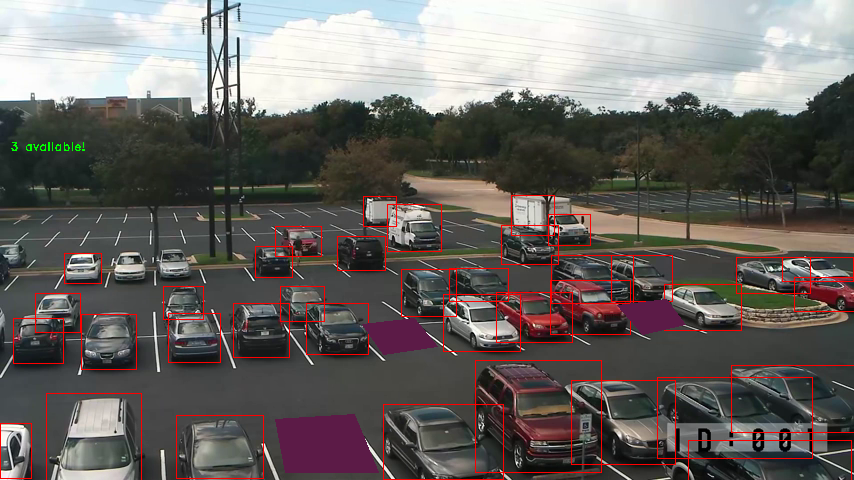

Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.1

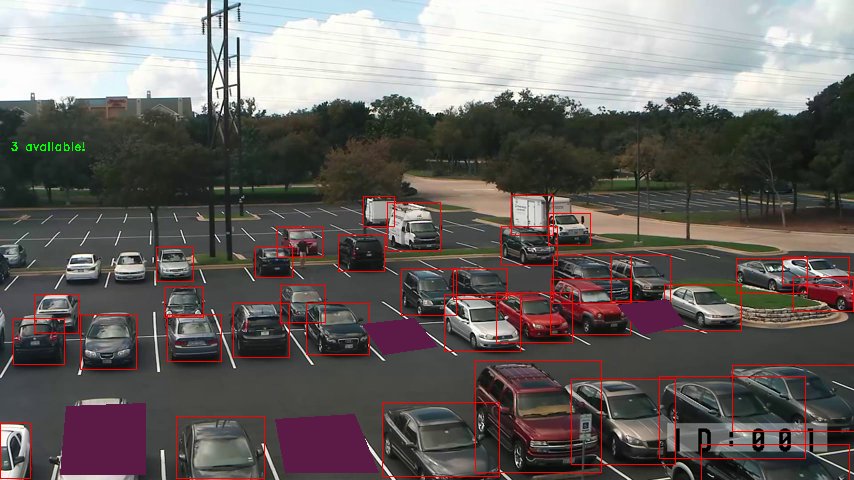

Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (480, 854, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.1

KeyboardInterrupt: ignored

In [ ]:
# Load the video file we want to run detection on
video_capture = cv2.VideoCapture(VIDEO_SOURCE)
# How many frames of video we've seen in a row with a parking space open
free_space_frames = 0


count = 0
available_slots = 0

# ---------------------------------------------------------------------------------------------------

alpha = 0.6
video_capture = cv2.VideoCapture(VIDEO_SOURCE)
cnt=0
video_FourCC    = cv2.VideoWriter_fourcc('M','J','P','G')

video_fps       = video_capture.get(cv2.CAP_PROP_FPS)
video_size      = (int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH)),
                    int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
out = cv2.VideoWriter("out.avi", video_FourCC, video_fps, video_size)
count = 0 
list_parked_space = []
while video_capture.isOpened():
    success, frame = video_capture.read()
    overlay = frame.copy()
    if not success:
        break
    rgb_image = frame[:, :, ::-1]
    results = model.detect([rgb_image], verbose=1)

# Mask R-CNN assumes we are running detection on multiple images.
# We only passed in one image to detect, so only grab the first result.

    r = results[0]
    count +=1
# result from M-RCNN prediction: visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores']
# results[0]['rois'] is the bouding box, results[0]['class_ids'] is the id of the prediction class
    car_boxes = get_car_boxes(r['rois'], results[0]['class_ids'])

    overlaps = compute_overlaps(parked_car_boxes, car_boxes)

    for i in range(len(car_boxes)):
      y1,x1,y2,x2 = car_boxes[i]
      cv2.rectangle(overlay,(x1,y1),(x2,y2),(0,0,255),1)
    free_space = {}
    for x,y in enumerate(parked_car_boxes):
      free_space['Slot '+str(x+1)] = False

    for parking_area, overlap_areas in zip(parked_car_boxes, overlaps):
      max_IoU_overlap = np.max(overlap_areas)
      slot_name = get_key(Slots,parking_area)
      if max_IoU_overlap < 0.15:
        cv2.fillPoly(overlay, [np.array(parking_area)], (71, 27, 92))
        free_space[slot_name] = True
    for key,value in free_space.items():
      if value == True:
        Slots_free_space_frames[key] += 1
      else:
# If no spots are free, reset the count
        Slots_free_space_frames[key] = 0
        Slots_status[key] = 'Parked'
# If a space has been free for several frames, we are pretty sure it is really free!
    for key, value in Slots_free_space_frames.items():
      if value > 10:
#Update final status
        Slots_status[key] = "Available"

    if count %10 == 0:
      print(Slots_status)
      available_slots = sum(value == 'Available' for value in Slots_status.values())
      print('Available:', available_slots)
      print('Total slots: ', len(parked_car_boxes))
      font = cv2.FONT_HERSHEY_DUPLEX
      cv2.putText(overlay, str(available_slots) + f" space available!", (10, 150), font, 0.4, (0, 255, 0))
      cv2_imshow(overlay)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
out.release()
cv2.destroyAllWindows()